In [1]:
library(tidyverse)
library(repr)
library(tidymodels)




Housing <- read_csv("https://raw.githubusercontent.com/jio7887oij/dsci-100-009-1/main/Housing.csv")

housing_split <- initial_split(Housing, prop = 0.75, strata = price)
housing_train <- training(housing_split)
housing_test <- testing(housing_split)
housing_train

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>
3430000,4000,2,1,1,yes,no,no,no,no,0,no,unfurnished
3430000,3185,2,1,1,yes,no,no,no,no,2,no,unfurnished
3430000,1950,3,2,2,yes,no,yes,no,no,0,yes,unfurnished
3423000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
3395000,4785,3,1,2,yes,yes,yes,no,yes,1,no,furnished
3395000,3450,3,1,1,yes,no,yes,no,no,2,no,unfurnished
3395000,3640,2,1,1,yes,no,no,no,no,0,no,furnished
3360000,3500,4,1,2,yes,no,no,no,yes,2,no,unfurnished
3360000,4960,4,1,3,no,no,no,no,no,0,no,semi-furnished


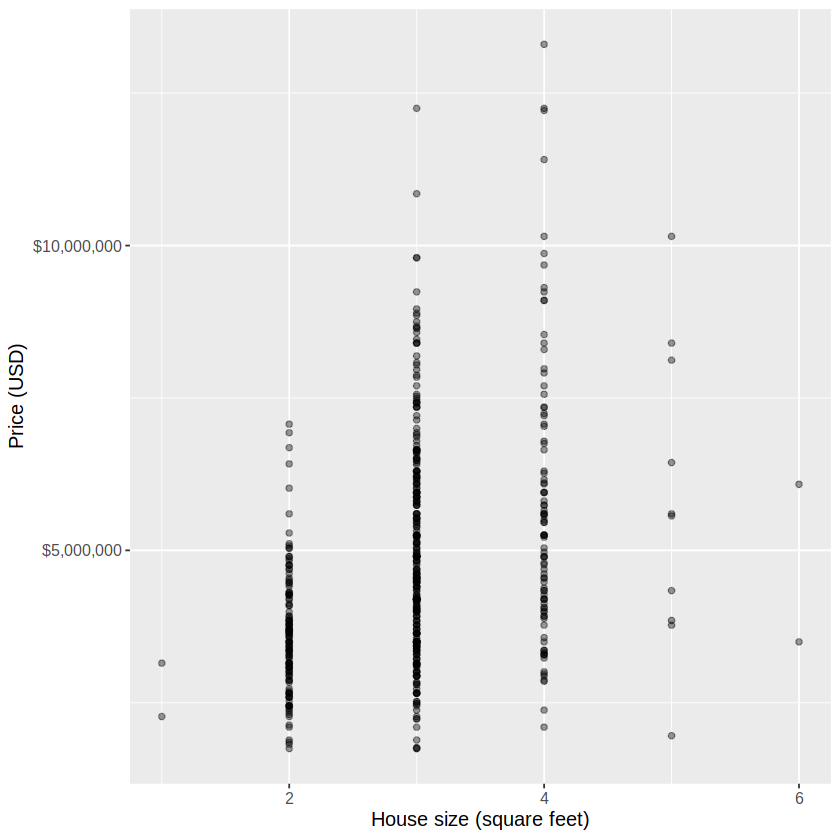

In [2]:
preview_1 <- ggplot(Housing, aes(x = area, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))


preview_2 <- ggplot(Housing, aes(x = bedrooms, y = price)) +
  geom_point(alpha = 0.4) +
  xlab("House size (square feet)") +
  ylab("Price (USD)") +
  scale_y_continuous(labels = dollar_format()) + 
  theme(text = element_text(size = 12))

preview_2

In [3]:
housing_train_selected <- housing_train |>
    select(price, area, bedrooms, bathrooms, stories) |>
    filter(bedrooms == 2 | bedrooms == 3 | bedrooms == 4) |>
    filter(bathrooms == 1 | bathrooms == 2)

housing_train_bedrooms <- housing_train_selected |>
    group_by(bedrooms) |>
    summarize(avg_price = mean(price), avg_area = mean(area))

housing_train_bathrooms <- housing_train_selected |>
    group_by(bathrooms) |>
    summarize(avg_price = mean(price), avg_area = mean(area))

housing_train_stories <- housing_train_selected |>
    group_by(stories) |>
    summarize(avg_price = mean(price), avg_area = mean(area))


housing_train_bedrooms

housing_train_bathrooms

housing_train_stories


bedrooms,avg_price,avg_area
<dbl>,<dbl>,<dbl>
2,3647495,4547.616
3,4914407,5230.595
4,5422870,5537.261


bathrooms,avg_price,avg_area
<dbl>,<dbl>,<dbl>
1,4177552,4890.893
2,6147884,5751.180


stories,avg_price,avg_area
<dbl>,<dbl>,<dbl>
1,4176111,5294.006
2,4640354,4685.946
3,5506577,5204.923
4,7009781,6403.500


Things to do:

- Visualize the datasets
- Number of observations